In [1]:
import pandas as pd

In [2]:
filename = 'tours.csv'
nb_runs = 500

In [3]:
for i in range(nb_runs):
    if i%100 == 0:
        print(i)
    !python jeu.py -j4 >> $filename
print("done!")

0
100
200
300
400
done!


In [4]:
df = pd.read_csv(filename, header=None, names=["tours"])
df.head()

,tours
0,45
1,59
2,114
3,67
4,59


<AxesSubplot: xlabel='index', ylabel='tours'>

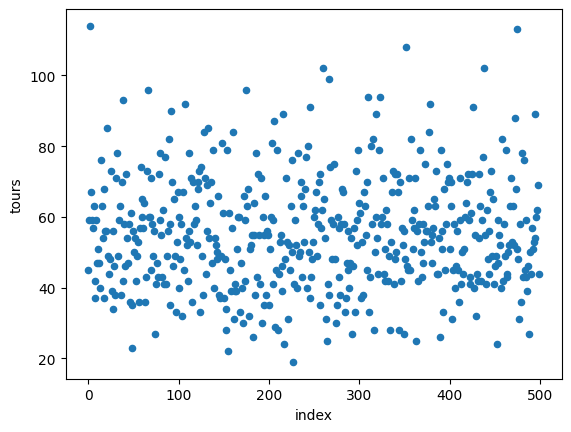

In [5]:
df.reset_index().plot.scatter(x = 'index', y = 'tours')

In [6]:
# Frequency
stats_df = df \
.groupby('tours') \
['tours'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'tours': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
#stats_df

<AxesSubplot: xlabel='tours'>

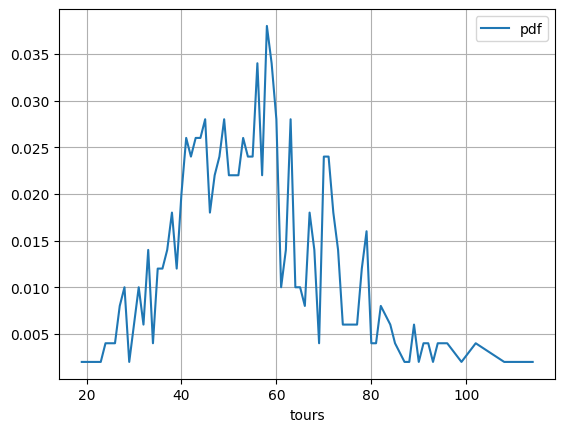

In [7]:
#stats_df.plot(x = 'tours', y = ['pdf', 'cdf'], grid = True)
stats_df.plot(x = 'tours', y = ['pdf'], grid = True)

<AxesSubplot: xlabel='tours'>

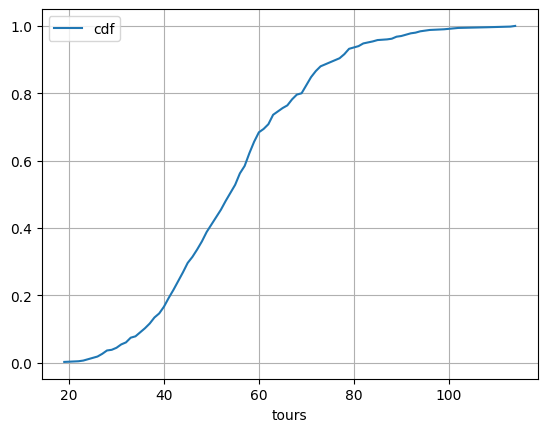

In [8]:
stats_df.plot(x = 'tours', y = ['cdf'], grid = True)